In [32]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
plt.style.use('./../../../MW_viz/matplotlib.mplstyle')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
with open('../../data/NICO_PICKLE/times.pickle', 'rb') as f:
    times =  pickle.load(f)
halos = list(times.keys())

In [14]:
def load_profiles(halo):
    Rall = np.loadtxt('../scripts/bins_profiles_{}.txt'.format(halo))
    Dall = np.loadtxt('../scripts/denstiy_profiles_{}.txt'.format(halo))
    Pall = np.loadtxt('../scripts/potential_profiles_{}.txt'.format(halo))
    Mall = np.loadtxt('../scripts/mass_profiles_{}.txt'.format(halo))
    return Rall, Dall, Pall, Mall    

In [23]:
model_density = np.loadtxt('../scripts/mwest_nfw_model.txt', skiprows=4)

In [26]:
model_density.shape

(999, 4)

In [51]:
with open('../../data/NICO_PICKLE/'+'merger_ratios.pickle', 'rb') as f:
    maratios = pickle.load(f)

mr = np.zeros(18)
i=0
for h in halos:
    mr[i] = maratios[h]
    i+=1

In [63]:
msort_list = list(np.argsort(mr)[::-1])

In [67]:
halos_sort = np.array(halos)[msort_list]

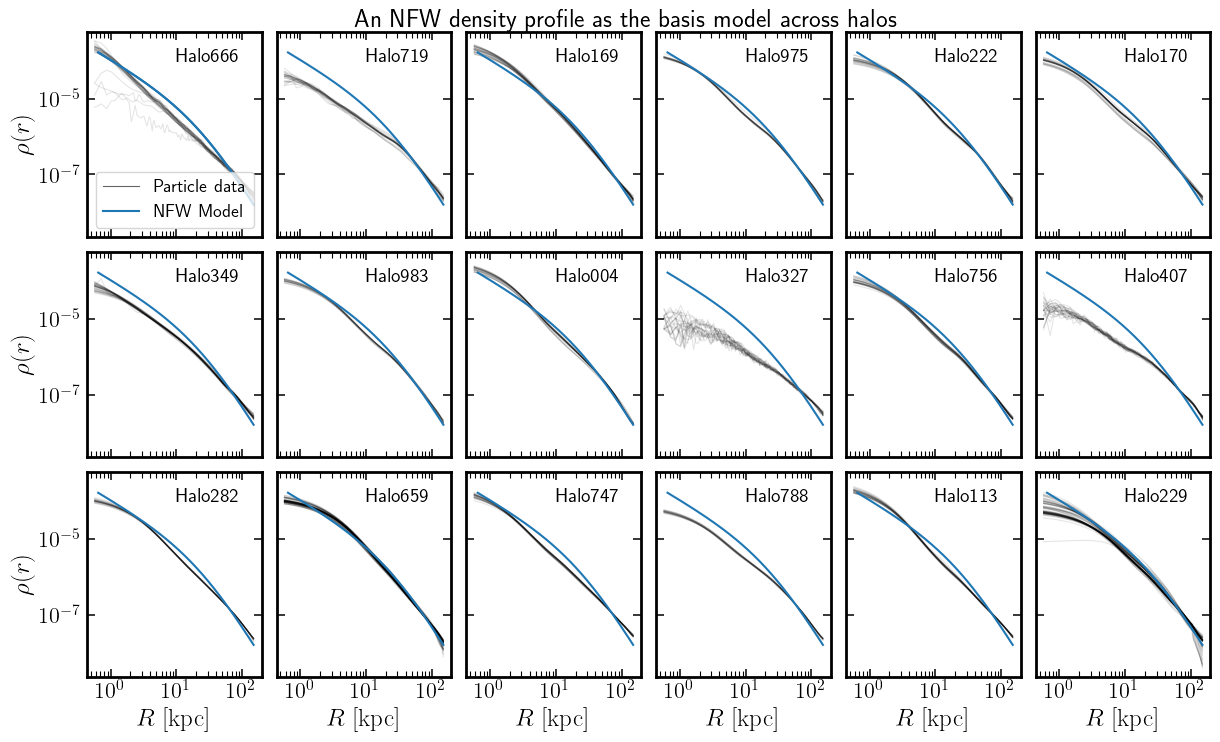

In [82]:
fig, ax = plt.subplots(3, 6, figsize=(12, 7), sharex=True, sharey=True)
axs = ax.flatten()
for i in range(len(axs)):
    R, D, _, _ = load_profiles(halos_sort[i])
    for n in range(len(R)):
        axs[i].loglog(R[n], D[n], c='k', alpha=0.1, lw=0.8)
    axs[i].loglog(model_density[:,0], model_density[:,1], lw=1.5)
    axs[i].text(10, 1e-4, '{}'.format(halos_sort[i]), fontsize=14)
fig.tight_layout()

axs[0].loglog(model_density[:,0], model_density[:,1], lw=0.8, c='k', alpha=0.6, label='Particle data')
axs[0].loglog(model_density[:,0], model_density[:,1], lw=1.5, c='C0', label='NFW Model')
axs[0].legend(loc='lower left', fontsize=13)
fig.suptitle('An NFW density profile as the basis model across DM halos', fontsize=18, y=1.01)
axs[0].set_ylabel(r'$\rho(r)$', fontsize=18)
axs[6].set_ylabel(r'$\rho(r)$', fontsize=18)
axs[12].set_ylabel(r'$\rho(r)$', fontsize=18)

for i in range(12, 18):
    axs[i].set_xlabel(r'$R\ \rm{[kpc]}$', fontsize=18)

plt.savefig('model_density_profiles.pdf', bbox_inches='tight')
plt.savefig('model_density_profiles.png', bbox_inches='tight')
plt.show()